In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy
from scipy.stats.stats import pearsonr
from pylab import rcParams


import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot



In [ ]:
%matplotlib inline 
rcParams['figure.figsize'] = 8,6
sns.set_style('whitegrid')

In [ ]:
data = pd.read_excel('/content/drive/My Drive/Oxford_University/simplified.xlsx')

In [ ]:
cols = data.columns

for i in cols[1:]:
  for j in range(len(data['ORGANISATION'])):
    if data[i][j] == 'Yes':
      data[i][j] = float(1)
    else:
      data[i][j] = float(0)

for i in cols[1:]:
  temp = pd.to_numeric(data[i], errors='coerce')
  data[i] = temp


In [ ]:
column = data.columns

df1 = pd.DataFrame()

df1['Organization'] = data[column[0]]
df1[column[1]] = data[column[1]]
df1[column[2]] = data[column[2]]
df1[column[3]] = data[column[3]]
df1[column[4]] = data[column[4]]
df1[column[5]] = data[column[5]]
df1[column[6]] = data[column[6]]
df1[column[7]] = data[column[7]]

df1[column[13]] = data[column[13]]
df1[column[14]] = data[column[14]]
df1[column[15]] = data[column[15]]
df1[column[16]] = data[column[16]]
df1[column[17]] = data[column[17]]
df1[column[18]] = data[column[18]]
df1[column[19]] = data[column[19]]
df1[column[20]] = data[column[20]]
df1[column[21]] = data[column[21]]
df1[column[22]] = data[column[22]]
df1[column[23]] = data[column[23]]
df1[column[24]] = data[column[24]]
df1[column[25]] = data[column[25]]
df1[column[26]] = data[column[26]]
df1[column[27]] = data[column[27]]
df1[column[28]] = data[column[28]]
df1[column[29]] = data[column[29]]
df1[column[30]] = data[column[30]]
df1[column[31]] = data[column[31]]
df1[column[32]] = data[column[32]]
df1[column[33]] = data[column[33]]

df1[column[-8]] = data[column[-8]]
df1[column[-7]] = data[column[-7]]
df1[column[-6]] = data[column[-6]]
df1[column[-5]] = data[column[-5]]
df1[column[-4]] = data[column[-4]]
df1[column[-3]] = data[column[-3]]
df1[column[-2]] = data[column[-2]]
df1[column[-1]] = data[column[-1]]

In [ ]:
dim = ['coordinate agents better','empower agents', 'impact the ecosystem', 'scale deep', 'scale up']
ont = ['disrupt the status quo','influence chains of cause-and-effect']
action = ['build adaptive capacity', 'build awareness and recognition',
       'build fellowship', 'cultivate cultures', 'develop governance',
       'develop leadership', 'develop or offer new products or services',
       'forge and or maintain coalitions and networks',
       'foster learning and adaptation',
       'initiate scientific or academic research',
       'inspire and or engage in advocacy',
       'nudge change in mindsets and social behaviors',
       'nudge change in policy or regulation',
       'promote knowledge exchange and transfer', 'funding individuals',
       'funding organizations', 'funding projects',
       'provide intangible technical, intellectual, or capable supports',
       'provide tangible infrastructure or resources',
       'provide training and education', 'pursue and or support partnerships']
void = ['government failure or inefficiency', 'lack of access',
       'lack of infrastructure', 'lack of knowledge, capacity, or skills',
       'lack of transparency or accountability',
       'market failure or inefficiency', 'neglected problems',
       'third sector failure or inefficiency']

print(len(dim))
print(len(ont))
print(len(action))
print(len(void))

In [ ]:
column = df1.columns

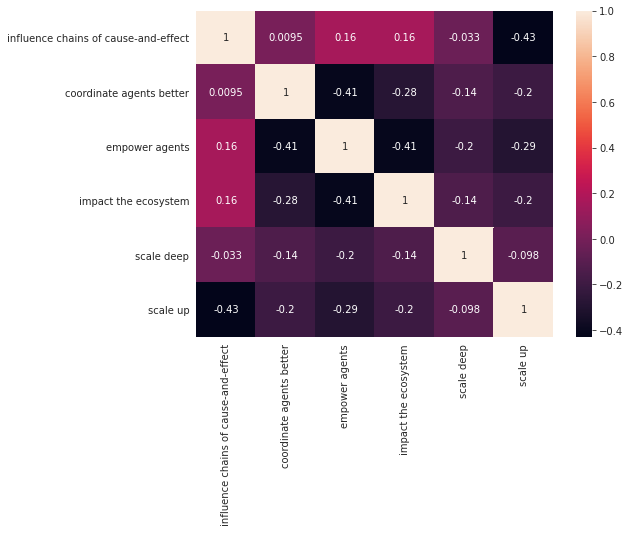

In [ ]:
# Correation between Ontology and Dominant intervention model
cols = column[2:8]
x = df1[cols]
corr = x.corr()

sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, annot=True)


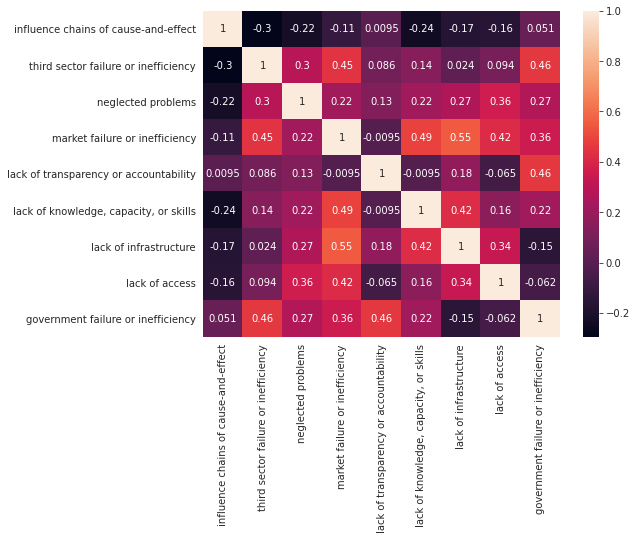

In [ ]:
# For Ontology and void variables
cols = []
cols.append('influence chains of cause-and-effect')

for i in range(8):
  cols.append(column[-(i+1)])

x = df1[cols]
corrs = x.corr()
sns.heatmap(corrs, annot=True)

In [ ]:
# Logistic Regression 

# For ontologies and intervention model 

feature_cols = ['coordinate agents better','empower agents', 'impact the ecosystem', 'scale deep', 'scale up']
X = df1[feature_cols]
y = df1['influence chains of cause-and-effect']

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logreg.coef_

array([[ 0.13579508,  0.45409918,  0.50905607, -0.02435121, -1.0745866 ]])

In [ ]:
temp2 = pd.DataFrame()
temp2['Feature_name '] = feature_cols
temp2['Weight'] = logreg.coef_[0]

In [ ]:
temp2

,Feature_name,Weight
0,coordinate agents better,0.135795
1,empower agents,0.454099
2,impact the ecosystem,0.509056
3,scale deep,-0.024351
4,scale up,-1.074587


In [ ]:
# Ontologies and voids

void = ['government failure or inefficiency', 'lack of access',
       'lack of infrastructure', 'lack of knowledge, capacity, or skills',
       'lack of transparency or accountability',
       'market failure or inefficiency', 'neglected problems',
       'third sector failure or inefficiency']
X = df1[void]
y = df1['influence chains of cause-and-effect']

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logreg.coef_

array([[ 0.45862181, -0.22666661, -0.19993649, -0.57878901, -0.01552183,
         0.19296255, -0.4055831 , -0.88374075]])

In [ ]:
temp2 = pd.DataFrame()
temp2['Feature_name '] = void
temp2['Weight'] = logreg.coef_[0]

In [ ]:
temp2

,Feature_name,Weight
0,government failure or inefficiency,0.458622
1,lack of access,-0.226667
2,lack of infrastructure,-0.199936
3,"lack of knowledge, capacity, or skills",-0.578789
4,lack of transparency or accountability,-0.015522
5,market failure or inefficiency,0.192963
6,neglected problems,-0.405583
7,third sector failure or inefficiency,-0.883741


In [ ]:
# For Dominant Intervention Model and Voids

void = ['government failure or inefficiency', 'lack of access',
       'lack of infrastructure', 'lack of knowledge, capacity, or skills',
       'lack of transparency or accountability',
       'market failure or inefficiency', 'neglected problems',
       'third sector failure or inefficiency']

X = df1[void]
y = df1['empower agents']

# Empower agents that is IM2 because it has higher prevalence

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)

print(logreg.coef_)

[[ 0.38397642  0.57210914 -0.41377601  0.4114019  -0.30139251  0.84169918
  -0.16325124 -0.20272891]]


In [ ]:
temp2 = pd.DataFrame()
temp2['Feature_name '] = void
temp2['Weight'] = logreg.coef_[0]

In [ ]:
temp2

,Feature_name,Weight
0,government failure or inefficiency,0.383976
1,lack of access,0.572109
2,lack of infrastructure,-0.413776
3,"lack of knowledge, capacity, or skills",0.411402
4,lack of transparency or accountability,-0.301393
5,market failure or inefficiency,0.841699
6,neglected problems,-0.163251
7,third sector failure or inefficiency,-0.202729


In [ ]:
# For ontologies and action


X = df1[action]
y = df1['influence chains of cause-and-effect']

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)

print(logreg.coef_)

[[ 0.68951342 -0.14139427  0.53195191  0.33041539 -0.73174201 -1.18810872
  -0.66345405 -0.29623959  0.37594634  0.16645379  0.17723875  0.4500575
   0.059758    0.0826719   0.2515384   0.10949801  0.52120724  0.23066508
  -0.57729157 -0.74338921  0.26450276]]


In [ ]:
temp2 = pd.DataFrame()
temp2['Feature_name '] = action
temp2['Weight'] = logreg.coef_[0]

In [ ]:
temp2

,Feature_name,Weight
0,build adaptive capacity,0.689513
1,build awareness and recognition,-0.141394
2,build fellowship,0.531952
3,cultivate cultures,0.330415
4,develop governance,-0.731742
5,develop leadership,-1.188109
6,develop or offer new products or services,-0.663454
7,forge and or maintain coalitions and networks,-0.296240
8,foster learning and adaptation,0.375946
9,initiate scientific or academic research,0.166454


In [ ]:
# PCA and Clustering


X = df1.iloc[:, 1:].values
#y = df1.iloc[:,2].values

# Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X)

# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)
X_train = pca.fit_transform(X_train)
explained_variance = pca.explained_variance_ratio_ 

sum = 0
for i in range(len(explained_variance)):
  sum = sum + explained_variance[i]

print(sum)

0.6583748829435625


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_train)
clusters = kmeans.predict(X_train)

In [ ]:
clusters

array([1, 0, 0, 2, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 1, 1, 1, 2, 1,
       2, 2, 2, 0, 1, 2, 0, 2, 2, 1], dtype=int32)

In [ ]:
temp3 = pd.DataFrame()
temp3['Organisation'] = df1['Organization']
temp3['Cluster'] = clusters

In [ ]:
temp3

,Organisation,Cluster
0,Acumen,1
1,Aga Khan,0
2,Ashoka,0
3,Bertha,2
4,Brac,0
5,CIFF,2
6,DMGT,1
7,Echoing Green,2
8,Ford,0
9,Fundacion Avina,1


In [ ]:
# Visualization of the clusters

#PCA with two principal components
pca_2d = PCA(n_components=2)


#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(X_train))

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]



In [ ]:
temp1 = pd.DataFrame(X_train)
temp1['Cluster'] = clusters
temp1['dummy'] = 0

In [ ]:
temp1 = pd.concat([temp1,PCs_2d], axis=1, join='inner')

#Note that all of the DataFrames below are sub-DataFrames of 'temp1'.
#This is because we intend to plot the values contained within each of these DataFrames.

cluster0 = temp1[temp1["Cluster"] == 0]
cluster1 = temp1[temp1["Cluster"] == 1]
cluster2 = temp1[temp1["Cluster"] == 2]

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
configure_plotly_browser_state()
init_notebook_mode(connected=True)

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)


In [ ]:
# Calculating entropy for the features

from math import log2
entropy = []

for i in range(1,len(col)):
  sum = 0
  name = col[i]
  zero, one = df1[name].value_counts()
  sum = - (zero/32 * log2(zero/32)  + one/32 * log2(one/32))
  entropy.append(sum)
  print(sum, col[i])



In [ ]:
# Function returns N largest elements 
def Nmaxelements(list1, N): 
	final_list = [] 

	for i in range(0, N): 
		max1 = 0
		
		for j in range(len(list1)):	 
			if list1[j] > max1: 
				max1 = list1[j]; 
				
		list1.remove(max1); 
		final_list.append(max1) 
		
	print(final_list) 


# Calling the function 
Nmaxelements(entropy, 7) 
